<a href="https://colab.research.google.com/github/AbiXnash/HGCNN-LSTM-A-Data-driven-Approach-for-Cyber-Attack-Detection-in-Cyber-Physical-Systems/blob/main/SWAT_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# content/drive/MyDrive/ColabNotebooks/SWaT_Dataset_Attack_v0.csv

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import random

seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

In [ ]:
# data = pd.read_csv('/content/SWaT_Dataset_Attack_v0.csv')


data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SWaT_Dataset_Attack_v0.csv')


In [ ]:
# data = data.loc[:, ~data.columns.duplicated()]

extra 1

In [ ]:
# df2 = df2.iloc[1:]
# print(df1.columns)
# print(df2.columns)
print(data.columns)

Index([' Timestamp', 'FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201',
       'AIT202', 'AIT203', 'FIT201', ' MV201', ' P201', ' P202', 'P203',
       ' P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301',
       'MV302', ' MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402',
       'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501',
       'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504',
       'P501', 'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602',
       'P603', 'Normal/Attack'],
      dtype='object')


extra 2

In [ ]:
del data[' Timestamp']
data.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


In [ ]:
data.shape

(449919, 52)

In [ ]:
data.describe()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603
count,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,449919.000000,...,449919.000000,449919.000000,449919.0,449919.000000,449919.000000,449919.000000,449919.000000,449919.0,449919.000000,449919.0
mean,1.714346,607.019967,1.665335,1.693251,1.006946,210.297302,8.528535,320.301478,1.702908,1.691584,...,0.283806,1.925862,1.0,232.173817,1.013408,174.714484,0.016566,1.0,1.009099,1.0
std,1.191716,125.303003,0.482323,0.461145,0.083051,35.157909,0.114844,16.631029,1.130277,0.470611,...,0.080924,0.261995,0.0,61.750930,0.412723,47.479809,0.159603,0.0,0.094956,0.0
min,0.000000,189.826300,0.000000,1.000000,1.000000,168.033800,6.000000,285.337100,0.000000,0.000000,...,0.000000,1.000000,1.0,9.468726,0.000000,3.140220,0.000000,1.0,1.000000,1.0
25%,0.000000,510.011100,1.000000,1.000000,1.000000,177.102000,8.441618,306.383000,0.000000,1.000000,...,0.306249,2.000000,1.0,248.029400,0.816967,186.698900,0.000000,1.0,1.000000,1.0
50%,2.477020,530.422500,2.000000,2.000000,1.000000,193.508100,8.551525,321.661100,2.446673,2.000000,...,0.306633,2.000000,1.0,249.295100,0.961138,187.724300,0.000000,1.0,1.000000,1.0
75%,2.577907,727.432100,2.000000,2.000000,1.000000,253.845200,8.610806,331.684200,2.454362,2.000000,...,0.308106,2.000000,1.0,250.881200,1.409669,189.118200,0.000128,1.0,1.000000,1.0
max,2.760145,925.032300,2.000000,2.000000,2.000000,267.719800,8.733210,384.465500,2.826899,2.000000,...,0.311693,2.000000,1.0,254.341800,1.970333,191.986000,1.802710,1.0,2.000000,1.0


In [ ]:
data['Normal/Attack'] = data['Normal/Attack'].replace('A ttack', 'Attack')
data['Normal/Attack'].value_counts()

Normal    395298
Attack     54621
Name: Normal/Attack, dtype: int64

In [ ]:
X = data.drop(columns = 'Normal/Attack', axis = 1)
Y = data['Normal/Attack']
print(X.shape, Y.shape)

(449919, 51) (449919,)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_resampled, Y_resampled = undersampler.fit_resample(X, Y)

unique_classes, counts = np.unique(Y_resampled, return_counts=True)
class_distribution = dict(zip(unique_classes, counts))

print("Class Distribution after Random Undersampling:")
for class_label, count in class_distribution.items():
   print(f"{class_label}: {count}")

Class Distribution after Random Undersampling:
Attack: 54621
Normal: 54621


In [ ]:
# Import necessary libraries for PCA
from sklearn.decomposition import PCA

# Assuming X is your original dataset before undersampling
# Apply PCA for dimensionality reduction
explained_variance_ratio_threshold = 0.95  # Adjust the threshold as needed
pca = PCA()
X_resampled_pca = pca.fit_transform(X_resampled)

# Find the number of components that explain the desired variance
cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_explained_variance_ratio >= explained_variance_ratio_threshold) + 1

# Set a minimum number of components to retain
min_components = 10  # Adjust as needed
num_components = max(num_components, min_components)

# Apply PCA with the selected number of components
pca = PCA(n_components=num_components)
X_resampled_selected = pca.fit_transform(X_resampled)

# Print the selected number of components
print("Number of selected components:", num_components)

# Split the dataset into train, validation, and test sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_resampled_selected, Y_resampled, test_size=0.20, shuffle=True, random_state=43)
X_train_selected, X_val_selected, y_train_selected, y_val_selected = train_test_split(X_train_selected, y_train_selected, test_size=0.20, random_state=42)

from sklearn.preprocessing import MinMaxScaler
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_val_selected_scaled = scaler.transform(X_val_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Reshape the data for CNN-LSTM
X_train_selected_reshaped = X_train_selected_scaled.reshape((X_train_selected_scaled.shape[0], X_train_selected_scaled.shape[1], 1))
X_val_selected_reshaped = X_val_selected_scaled.reshape((X_val_selected_scaled.shape[0], X_val_selected_scaled.shape[1], 1))
X_test_selected_reshaped = X_test_selected_scaled.reshape((X_test_selected_scaled.shape[0], X_test_selected_scaled.shape[1], 1))

# Continue with the rest of your code for training and evaluating the CNN-LSTM model


Number of selected components: 10


In [ ]:
# X = X_resampled
# Y = Y_resampled

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# Y = label_encoder.fit_transform(Y)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=True, random_state=43)

# # Further split the training data into 80% for training and 20% for validation
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [ ]:
# X.shape, X_train.shape, X_test.shape

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_val = scaler.transform(X_val)
# X_test = scaler.transform(X_test)

# Reshape the data for CNN-LSTM
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# X.shape, X_train.shape, X_test.shape, X_val.shape

In [ ]:
import matplotlib.pyplot as plt

def plot_training_vs_validation(history, model):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Accuracy Plot
    ax[0].plot(history.history['accuracy'], 'b-', label="Training Accuracy")
    ax[0].plot(history.history['val_accuracy'], 'r-', label="Validation Accuracy")
    ax[0].set_title('Training vs Validation Accuracy - ' + model)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Accuracy')
    ax[0].grid(True)
    ax[0].legend()

    # Loss Plot
    ax[1].plot(history.history['loss'], 'g-', label="Training Loss")
    ax[1].plot(history.history['val_loss'], 'c-', label="Validation Loss")
    ax[1].set_title('Training vs Validation Loss - ' + model)
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss')
    ax[1].grid(True)
    ax[1].legend()

    plt.tight_layout()
    plt.show()



In [ ]:

# from keras.regularizers import l2
# model = Sequential()
# model.add(Conv1D(filters=54, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1), kernel_regularizer=l2(0.1)))
# model.add(MaxPooling1D(pool_size=3))
# model.add(LSTM(units=200, activation='relu', return_sequences=True, kernel_regularizer=l2(0.01)))
# model.add(Dropout(0.25))
# model.add(LSTM(units=100, activation='relu', kernel_regularizer=l2(0.01)))
# model.add(Dropout(0.15))
# model.add(Dense(units=15, activation='softmax'))


In [ ]:
# model.layers

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_selected = label_encoder.fit_transform(y_train_selected)
y_val_selected = label_encoder.transform(y_val_selected)
y_test_selected_encoded = label_encoder.transform(y_test_selected)


from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Assuming X_train_selected_reshaped, y_train_selected, X_val_selected_reshaped, y_val_selected are defined

model = Sequential()
model.add(Conv1D(filters=54, kernel_size=3, activation='relu', input_shape=(X_train_selected_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(units=100, activation='relu', return_sequences=True))
model.add(Dropout(0.25))  # Increase dropout
model.add(LSTM(units=50, activation='relu'))
model.add(Dropout(0.15))  # Adjust dropout
model.add(Dense(units=10, activation='softmax'))

adam_optimizer = Adam(learning_rate=1e-4)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=adam_optimizer,
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='best_model_combined.h5', monitor='val_loss', save_best_only=True)
]

history = model.fit(
    X_train_selected_reshaped, y_train_selected,
    epochs=50,
    batch_size=256,
    validation_data=(X_val_selected_reshaped, y_val_selected),
    callbacks=callbacks
)


Epoch 1/50
274/274 [==============================] - 7s 18ms/step - loss: 1.5972 - accuracy: 0.4961 - val_loss: 0.6878 - val_accuracy: 0.4883
Epoch 2/50
  9/274 [..............................] - ETA: 4s - loss: 0.7303 - accuracy: 0.5256

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


274/274 [==============================] - 6s 20ms/step - loss: 0.6858 - accuracy: 0.5737 - val_loss: 0.5740 - val_accuracy: 0.7459
Epoch 3/50
274/274 [==============================] - 5s 17ms/step - loss: 0.5157 - accuracy: 0.7555 - val_loss: 0.4318 - val_accuracy: 0.7997
Epoch 4/50
274/274 [==============================] - 5s 18ms/step - loss: 0.4378 - accuracy: 0.8026 - val_loss: 0.4078 - val_accuracy: 0.8107
Epoch 5/50
274/274 [==============================] - 6s 21ms/step - loss: 0.4149 - accuracy: 0.8132 - val_loss: 0.3923 - val_accuracy: 0.8183
Epoch 6/50
274/274 [==============================] - 7s 27ms/step - loss: 0.4004 - accuracy: 0.8203 - val_loss: 0.3796 - val_accuracy: 0.8281
Epoch 7/50
274/274 [==============================] - 5s 18ms/step - loss: 0.3887 - accuracy: 0.8267 - val_loss: 0.3754 - val_accuracy: 0.8287
Epoch 8/50
274/274 [==============================] - 5s 17ms/step - loss: 0.3799 - accuracy: 0.8336 - val_loss: 0.3826 - val_accuracy: 0.8287
Epoch 9/50

In [ ]:
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPooling1D, LSTM, Dropout, Dense
# from keras.optimizers import Adam
# from keras.callbacks import EarlyStopping, ModelCheckpoint

# # Assuming X_train, y_train, X_val, y_val are defined

# model = Sequential()
# model.add(Conv1D(filters=54, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(LSTM(units=100, activation='relu', return_sequences=True))
# model.add(Dropout(0.25))  # Increase dropout
# model.add(LSTM(units=50, activation='relu'))
# model.add(Dropout(0.15))  # Adjust dropouta
# model.add(Dense(units=10, activation='softmax'))

# adam_optimizer = Adam(learning_rate=1e-4)

# model.compile(
#     loss='sparse_categorical_crossentropy',
#     optimizer=adam_optimizer,
#     metrics=['accuracy']
# )

# callbacks = [
#     EarlyStopping(monitor='val_loss', patience=10),
#     ModelCheckpoint(filepath='best_model_combined.h5', monitor='val_loss', save_best_only=True)
# ]

# history = model.fit(
#     X_train, y_train,
#     epochs=50,
#     batch_size=256,
#     validation_data=(X_val, y_val),
#     callbacks=callbacks
# )


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 8, 54)             216       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 4, 54)             0         
 g1D)                                                            
                                                                 
 lstm_4 (LSTM)               (None, 4, 100)            62000     
                                                                 
 dropout_4 (Dropout)         (None, 4, 100)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                      

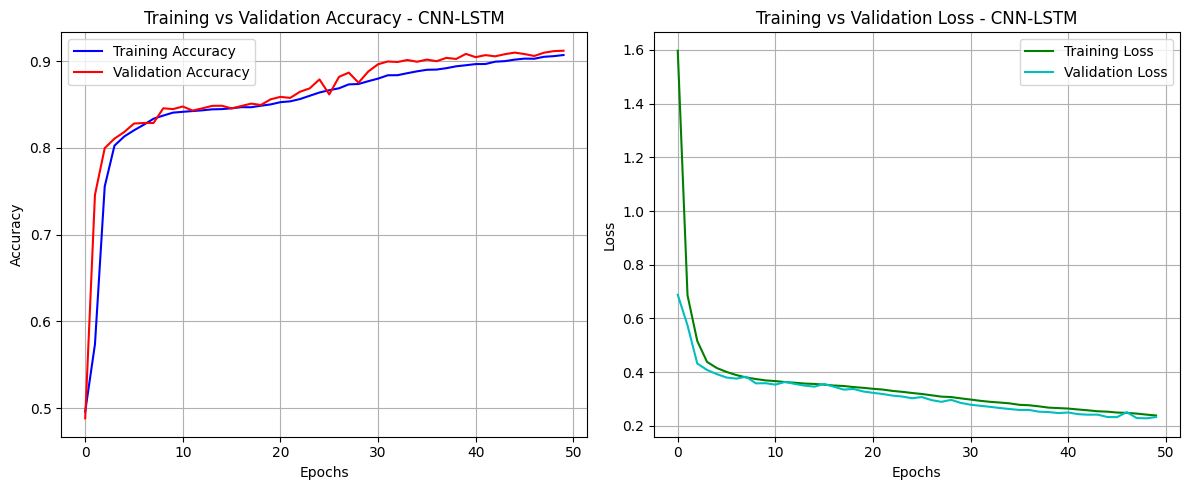

In [ ]:
plot_training_vs_validation(history,"CNN")

In [ ]:
print("Unique values in y_train_selected:", set(y_train_selected))
print("Unique values in y_test_selected:", set(y_test_selected))


Unique values in y_train_selected: {0, 1}
Unique values in y_test_selected: {'Normal', 'Attack'}
